<h1> SDATA Projet</h1>
 
### Author : Radia EL HAMDOUNI.

from https://mylearningspace.imt-lille-douai.fr/course/view.php?id=249

### Start Date : Tuesday January 19th ,2021.

### Introduction
In this project, we will use a dataset generated using the Spotify API, it contains ex-
tracted and gathered features for many songs

### Goal
* Classification challenge

### Evaluation 
   #### Metric : 
F-score

### The target variable is genre

### Import dependencies

In [375]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
sns.set()
plt.close()


import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from jupyter_dash import JupyterDash
from plotly.subplots import make_subplots
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
pio.templates.default = 'plotly_white'

import panel as pn
pn.extension()
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets

import feather

### Quick access to documentation

In [147]:
button = pn.widgets.Button(name='Open URL', button_type = 'primary')
urls = ["https://scikit-learn.org/stable/","https://panel.holoviz.org/","https://docs.bokeh.org/en/latest/docs/reference.html","https://dash.plotly.com/","https://numpy.org/","https://seaborn.pydata.org/tutorial.html","https://matplotlib.org/3.3.3/contents.html"]
select = pn.widgets.Select(name='', options=urls)
button.js_on_click(args={'target': select}, code='window.open(target.value)')
pn.Row(select, button)

Row
    [0] Select(options=['https://scikit-learn.org...], value='https://scikit-learn.org/...)
    [1] Button(button_type='primary', name='Open URL')

### Plotly color swatches

In [344]:
import plotly.express as px

#fig = px.colors.sequential.swatches()
fig = px.colors.qualitative.swatches()
fig.show()

# color_discrete_sequence=px.colors.sequential.Plasma_r

## Loading the training Dataset¶

In [148]:
# load data
df = pd.read_csv("./dataset/Spotify_train_dataset.csv")

### Loading the test Datasets

In [149]:
test = pd.read_csv("./dataset/Spotify_test_dataset.csv")

<p>Function to better display large dataframes</p>

In [150]:
# Display the dataframe entirely
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
        
display_all(df.head().transpose())

,0,1,2,3,4
danceability,0.449,0.618,0.696,0.769,0.4
energy,0.809,0.654,0.896,0.506,0.676
key,6,5,7,0,11
loudness,-3.366,-14.305,-5.915,-11.658,-7.118
mode,1,0,1,1,0
speechiness,0.0847,0.422,0.108,0.0452,0.0927
acousticness,0.00234,0.226,0.0164,0.00273,0.258
instrumentalness,0.876,0.864,0.866,0,2.27e-05
liveness,0.11,0.111,0.103,0.0832,0.32
valence,0.115,0.176,0.57,0.102,0.354


#### The data has 31728 row and 20 columns

In [151]:
df.shape

(31728, 20)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31728 entries, 0 to 31727
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      31728 non-null  float64
 1   energy            31728 non-null  float64
 2   key               31728 non-null  int64  
 3   loudness          31728 non-null  float64
 4   mode              31728 non-null  int64  
 5   speechiness       31728 non-null  float64
 6   acousticness      31728 non-null  float64
 7   instrumentalness  31728 non-null  float64
 8   liveness          31728 non-null  float64
 9   valence           31728 non-null  float64
 10  tempo             31728 non-null  float64
 11  type              31728 non-null  object 
 12  id                31728 non-null  object 
 13  uri               31728 non-null  object 
 14  track_href        31728 non-null  object 
 15  analysis_url      31728 non-null  object 
 16  duration_ms       31728 non-null  int64 

In [404]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000,31728.000000
mean,0.639464,0.762916,5.376828,-6.469376,0.549294,0.136506,0.095588,0.285514,0.214131,0.356917,147.375311,251374.491553,3.973147
std,0.156270,0.183542,3.661638,2.926137,0.497572,0.126527,0.170582,0.371836,0.175920,0.233563,23.823179,103233.266462,0.269429
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,61.309000,25600.000000,1.000000
25%,0.524000,0.633000,1.000000,-8.161000,0.000000,0.049000,0.001690,0.000000,0.099500,0.160750,129.865250,180000.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.247000,1.000000,0.075500,0.016400,0.006235,0.135000,0.321000,144.958000,225042.500000,4.000000
75%,0.766000,0.922000,9.000000,-4.522000,1.000000,0.193000,0.106000,0.727000,0.293000,0.522000,161.041000,302002.500000,4.000000
max,0.988000,1.000000,11.000000,3.108000,1.000000,0.944000,0.986000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


# Life Cycle Of A Data Science Project 

* 0 - Data Analysis 
* 1 - Data Preprocessing
* 2 - Feature engineering
* 3 - Feature Selection
* 4 - Model Building
* 5 - Model Deployment 

<h3>  Let's start with some EDA :) </h3>

Let's start by analyzing  the genre column since it's our target variable

In [152]:
total = df.genre.value_counts().count()
print('There are' , str(total) , "genres of music")

There are 15 genres of music


In [153]:
genre_count = df.genre.value_counts()
genre_count

Underground Rap    4378
Dark Trap          3378
trance             2275
trap               2260
Hiphop             2255
techhouse          2254
techno             2226
psytrance          2214
dnb                2213
hardstyle          2178
RnB                1605
Trap Metal         1474
Rap                1420
Emo                1262
Pop                 336
Name: genre, dtype: int64

In [154]:
genres = df.genre.unique()
genredf = pd.DataFrame({"genre" : genres , "count" :genre_count })

### Pie charts

In [311]:
fig = px.pie( genredf, values='count', names='genre', title='% of genres' , color_discrete_sequence=px.colors.sequential.Plasma_r,)
fig.show()


In [343]:
fig = px.bar(genre_count,color_discrete_sequence = px.colors.qualitative.Antique)
fig.show()

#### assigning variables for each genre

In [157]:
Underground_Rap  = df[(df.genre=='Underground Rap ')]
Dark_Trap  = df[(df.genre=='Dark Trap ')]
trance = df[(df.genre=='trance')]
trap = df[(df.genre=='trap')]
Hiphop = df[(df.genre=='Hiphop')]
techhouse = df[(df.genre=='techhouse')]
psytrance = df[(df.genre=='psytrance')]
dnb  = df[(df.genre=='dnb ')]
RnB  = df[(df.genre=='RnB ')]
Trap_Metal = df[(df.genre=='Trap Metal')]
Rap = df[(df.genre=='Rap')]
Emo  = df[(df.genre=='Emo ')]
Pop = df[(df.genre=='Pop')]


#### Spotting missing values

In [158]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

Button(description='Train set', style=ButtonStyle())

HTML(value='click the button to compare with the <b>test set</b>')

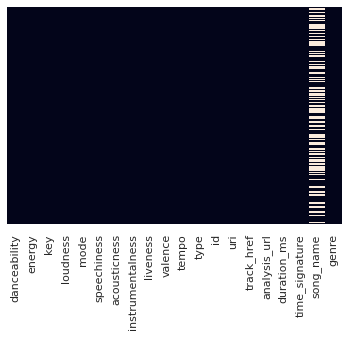

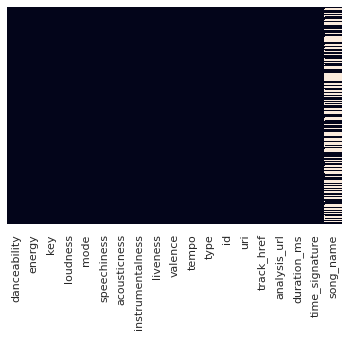

In [300]:
from IPython.display import display

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

button = widgets.Button(description="Train set")

def on_button_clicked(b):
     sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

button.on_click(on_button_clicked)
display(button,widgets.HTML(
    value="click the button to compare with the <b>test set</b>",group
))

In [203]:
## total sum of null values per column
def col_nan(df): return [feature for feature in df.columns if df[feature].isnull().sum() > 1]
print('\n')
def percent_na_col(df):
    l_na = col_nan(df)
    for l in l_na : 
        print("+ " + l + ""+" has "+str(round(df[l].isnull().sum()/df.shape[0]*100,4))+ "% of missing values")
                            
percent_na_col(df)



+ song_name has 49.2467% of missing values


### Checking for duplicates

In [331]:
# Create a DataFrame object
dfObj = pd.DataFrame(df, columns=['id'])

# Find a duplicate rows
duplicateDFRow = dfObj[dfObj.duplicated()]
print("There are: " + str(len(duplicateDFRow)) + " duplicates.")

There are: 3866 duplicates


In the cleaning process they will be dropped :)

## Analyzing Numerical Variables

#### Identifying the numerical features

In [161]:
num = [col for col in df.columns if df[col].dtype != "O"]
print("There are 13 numerical variable in the dataset:" ,len(num)) # 38 ~ 50% of the features are numerical features

There are 13 numerical variable in the dataset: 13


Let's start by analyzing discrete variables. 

In [162]:
dff = df.copy()

dscr = [col for col in dff[num].columns if len(dff[num].groupby(col)[col].unique()) < 20]
dscr

['key', 'mode', 'time_signature']

In [163]:
dff = df.copy()
dscr = [col for col in dff[num].columns if len(dff[num].groupby(col)[col].unique()) < 20]


#### time_signature 

In [414]:
mdf = pd.DataFrame({"ts":[4, 5, 3, 1], "count" :df.groupby("time_signature")["time_signature"].count()})
fig = px.pie(mdf,values='count', names='ts', title='% of mode' ,color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()


### Impact of time signature on genres

we see that the genres 'dnb', 'psytrance', 'trance' don't take the time signature 1

In [424]:
np.setdiff1d(genres,df[df['time_signature']==1].genre.unique())

array(['dnb', 'psytrance', 'trance'], dtype=object)

### Impact of key signature on genres

In [494]:
kdf = pd.DataFrame({"key":keys , "count" : df.groupby("key")["key"].count().count()})
fig = px.pie(kdf,values='count', names='key', title='% of key' ,color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

Let' see the proportion of keys in every genre

In [512]:
genre_all = [g for g in genres]
genre_all.append('all')
keys = [x for x in range(12)]
# Build App
app = JupyterDash(__name__)

app.layout = html.Div([
html.H1("impact of the continuous variables on the genres"),
    
dcc.Dropdown(
        id='dropdown2', clearable=False,
        value= 'Rap', options=[
            {'label': c, 'value': c}
            for c in genre_all
        ]),

    

    
html.Div(html.Center(dcc.Graph(id='graph1')),

)])


@app.callback(Output("graph1","figure"),[Input("dropdown2","value")])
def impact1(val1):
    if val1==None : 
        pass
    else:
        if val1 == "all" :
            kdf = pd.DataFrame({"key":keys , "count" : df.groupby("key")["key"].count().count()})
            fig = px.pie(kdf,values='count', names='key', title='% of key'+str(val1) ,color_discrete_sequence = px.colors.qualitative.Prism)
            return fig
            
        else: 
            l = []
            for k in keys:
                l.append(df.query("key == "+ str(k))[df['genre']== str(val1)].key.count())
            mdf = pd.DataFrame({"key":keys , "count" : l})
            fig = px.pie(mdf,values='count', names='key', title='% of keys in the genre '+str(val1),color_discrete_sequence = px.colors.sequential.RdBu)
            return fig



# Run app and display result inline in the notebook
app.run_server(mode='inline', use_reloader=False, port = 8080)

In [377]:
mdf = pd.DataFrame({"mode":[0,1] , "count" :df.groupby("mode")['mode'].count()})
fig = px.pie(mdf,values='count', names='mode', title='% of mode' ,color_discrete_sequence = px.colors.sequential.RdBu)
fig.show()

In [ ]:
mdf = pd.DataFrame({"mode":[0,1] , "count" :df.groupby("mode")['mode'].count()})
fig = px.pie(mdf,values='count', names='mode', title='% of mode' ,color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

#### Let's switch the focus now to the continous variables and plot their distribution.

In [164]:
conti = [val for val in num if val not in dscr]
conti

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

###  Distribution of the continuous variables

We notice that there are some outliers and the distribution of most of the features is skewed to the left.
We need to normalize these distributions in the data preprocessing part.

In [516]:
genre_all = [g for g in genres]
genre_all.append('all')
# Build App
app = JupyterDash(__name__)

app.layout = html.Div([
html.H1("impact of the continuous variables on the genres"),
    
dcc.Dropdown(
        id='dropdown2', clearable=False,
        value= 'Rap', options=[
            {'label': c, 'value': c}
            for c in genre_all
        ]),
dcc.Dropdown(
        id='dropdown1', clearable=False,
        value= 'speechiness', options=[
            {'label': c, 'value': c}
            for c in conti
        ]),
    

    
html.Div(html.Center(dcc.Graph(id='graph1')),

)])


@app.callback(Output("graph1","figure"),[Input("dropdown1","value"),Input("dropdown2","value")])
def impact1(val1,val2):
    if val1==None or val2==None: 
        pass
    else:
        if val2 == "all" :
            fig = px.histogram(df[val1],marginal="box")
            return fig
            
        else: 
            fig = px.histogram(df[df["genre"] == val2][val1],marginal="box",color_discrete_sequence=px.colors.qualitative.Dark2)
            return fig




# Run app and display result inline in the notebook
app.run_server(mode='inline', use_reloader=False, port = 8080)

### Correlation matrix

<AxesSubplot:title={'center':'Correlation matrix '}>

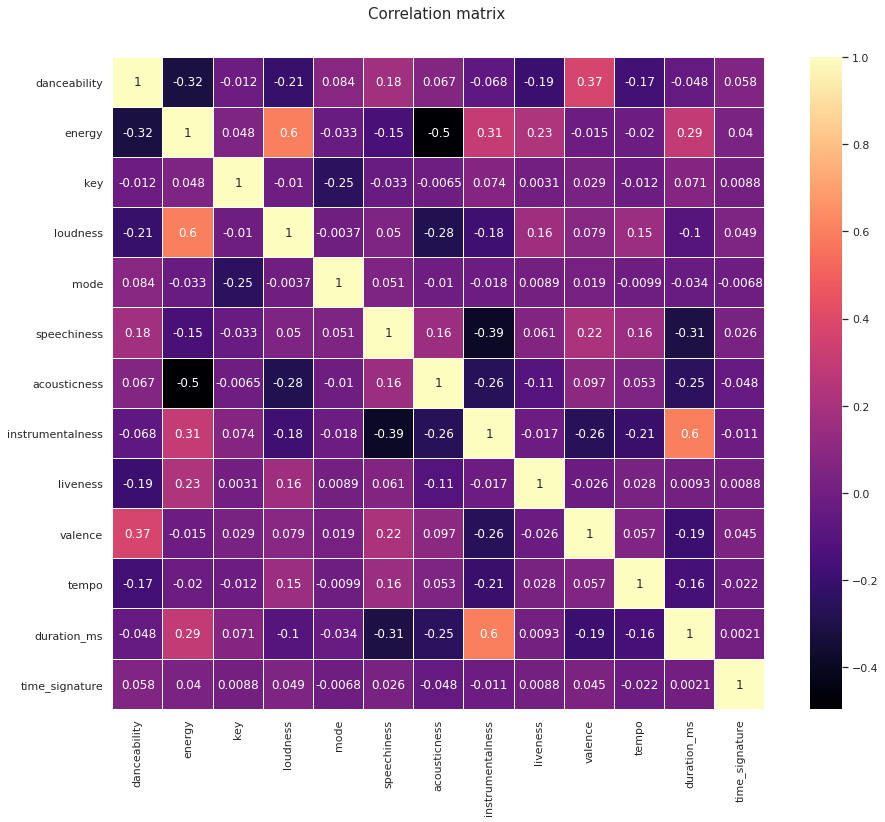

In [515]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Correlation matrix', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)



## Scatter Plots

In [513]:
genre_all = [g for g in genres]
genre_all.append('all')
conti2 = [val for val in num if val not in dscr]
# Build App
app = JupyterDash(__name__)

app.layout = html.Div([
  
dcc.Dropdown(
        id='dropdown0', clearable=False,
        value= 'Rap', options=[
            {'label': c, 'value': c}
            for c in genre_all
        ]),    
dcc.Dropdown(
        id='dropdown1', clearable=False,
        value= 'speechiness', options=[
            {'label': c, 'value': c}
            for c in conti
        ]),
dcc.Dropdown(
        id='dropdown2', clearable=False,
        value= 'energy', options=[
            {'label': c1, 'value': c1}
            for c1 in conti2
            
        ]),
        
    
html.Div(html.Center(dcc.Graph(id='graph1')),

)])

@app.callback(Output("graph1","figure"),[Input("dropdown0","value"),Input("dropdown1","value"),Input("dropdown2","value")])
def impact1(val0,val1,val2):
    if val1==None or val2==None: 
        pass
    else:
        if val0 == "all" :
            fig = px.scatter(df, x = val1 , y= val2)
        else: 
            dff = df[(df.genre==val0)]
            fig = px.scatter(dff, x = val1 , y= val2)
        return fig




# Run app and display result inline in the notebook
app.run_server(mode='inline', use_reloader=False, port = 8080)



In [299]:
genres

array(['trap', 'techno', 'Dark Trap', 'Underground Rap', 'hardstyle',
       'Trap Metal', 'techhouse', 'RnB', 'psytrance', 'Emo', 'dnb',
       'trance', 'Rap', 'Hiphop', 'Pop'], dtype=object)

<AxesSubplot:>

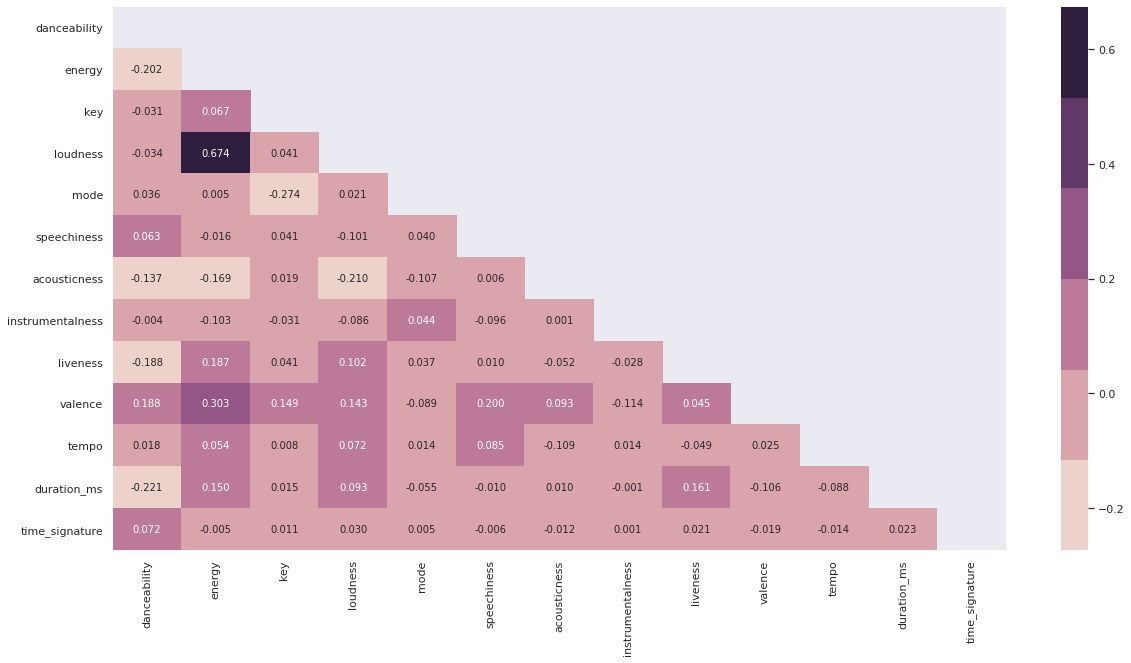

In [166]:
corr_feat = Rap.corr().index
cmap = np.corrcoef(Rap[corr_feat].values.T)
mask = np.zeros_like(cmap,dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(cmap,
            annot=True,
            fmt=".3f",
            annot_kws = {"size":10},
            cmap=sns.cubehelix_palette(),
            xticklabels = corr_feat.values,
            yticklabels = corr_feat.values,
            mask=mask)


### Analyzing the string variables

In [277]:
duplicate = df[df.duplicated(keep = 'last')] 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,genre
0,0.449,0.809,6,-3.366,1,0.0847,0.002340,0.876000,0.1100,0.1150,142.490,audio_features,15iEkKqQPgXjtHrvvL4Gvb,spotify:track:15iEkKqQPgXjtHrvvL4Gvb,https://api.spotify.com/v1/tracks/15iEkKqQPgXj...,https://api.spotify.com/v1/audio-analysis/15iE...,234310,4,NaN,trap
24,0.588,0.794,6,-4.306,1,0.0404,0.012100,0.000005,0.2790,0.2040,149.939,audio_features,5DkCAVqn09WAPOPiphKOUD,spotify:track:5DkCAVqn09WAPOPiphKOUD,https://api.spotify.com/v1/tracks/5DkCAVqn09WA...,https://api.spotify.com/v1/audio-analysis/5DkC...,208800,4,NaN,hardstyle
27,0.580,0.944,7,-6.631,1,0.0414,0.000091,0.803000,0.9440,0.1850,145.010,audio_features,7b632zTAPRwgRBaG5FFSGJ,spotify:track:7b632zTAPRwgRBaG5FFSGJ,https://api.spotify.com/v1/tracks/7b632zTAPRwg...,https://api.spotify.com/v1/audio-analysis/7b63...,436966,4,NaN,psytrance
28,0.638,0.813,3,-10.280,1,0.0381,0.033000,0.901000,0.1110,0.0854,135.002,audio_features,3dRWznkPBOLrn1xa4Tn0d6,spotify:track:3dRWznkPBOLrn1xa4Tn0d6,https://api.spotify.com/v1/tracks/3dRWznkPBOLr...,https://api.spotify.com/v1/audio-analysis/3dRW...,377879,4,NaN,techno
29,0.298,0.822,1,-3.825,1,0.0983,0.000776,0.104000,0.1560,0.1580,174.007,audio_features,3e5tNy2a5uD2Vb9c1PAdQt,spotify:track:3e5tNy2a5uD2Vb9c1PAdQt,https://api.spotify.com/v1/tracks/3e5tNy2a5uD2...,https://api.spotify.com/v1/audio-analysis/3e5t...,227155,4,NaN,dnb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30492,0.703,0.929,3,-6.500,0,0.0661,0.007610,0.003340,0.2190,0.5850,128.005,audio_features,7CN6ZYIX338ekn7pb2CpQp,spotify:track:7CN6ZYIX338ekn7pb2CpQp,https://api.spotify.com/v1/tracks/7CN6ZYIX338e...,https://api.spotify.com/v1/audio-analysis/7CN6...,156630,4,NaN,techhouse
30549,0.588,0.706,6,-6.363,1,0.0281,0.009730,0.000084,0.0773,0.2680,129.850,audio_features,4TbjGgV1EHSpvK5CaEgICK,spotify:track:4TbjGgV1EHSpvK5CaEgICK,https://api.spotify.com/v1/tracks/4TbjGgV1EHSp...,https://api.spotify.com/v1/audio-analysis/4Tbj...,194597,4,NaN,trance
30802,0.556,0.937,8,-1.825,0,0.3920,0.042600,0.293000,0.5210,0.5230,139.380,audio_features,3Cpmc9I4U5Vq0vj3A1u9QX,spotify:track:3Cpmc9I4U5Vq0vj3A1u9QX,https://api.spotify.com/v1/tracks/3Cpmc9I4U5Vq...,https://api.spotify.com/v1/audio-analysis/3Cpm...,192000,4,NaN,trap
30864,0.712,0.920,1,0.576,1,0.1500,0.002000,0.002950,0.1660,0.4810,149.913,audio_features,52Tx4HfJMJegYF3JPgg4EN,spotify:track:52Tx4HfJMJegYF3JPgg4EN,https://api.spotify.com/v1/tracks/52Tx4HfJMJeg...,https://api.spotify.com/v1/audio-analysis/52Tx...,197867,4,NaN,trap


In [278]:
(31728 - 27862)/31728

0.12184820978315683

In [274]:
df.shape[0]

31728

In [270]:
len(df['id'].unique())

27862

In [173]:
string  = [col for col in df.columns if df[col].dtype == "O"]
string

['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'genre']

We notice that there's only one value in the column type which is 'audio_features'

In [176]:
df['type'].unique() 
# The column "type" needs to be droped

array(['audio_features'], dtype=object)

In [204]:
df['song_name'].head(10)

0                                      NaN
1                                      NaN
2                                      NaN
3                              $UICIDEWAVE
4                   TR666 (feat. Swae Lee)
5                                      NaN
6                         Pull the Trigger
7                   If I'm Lyin, I'm Flyin
8                                      NaN
9    Someone Protects Her (Prod. By Falls)
Name: song_name, dtype: object

In [195]:
print(Rap["id"].head(15))
print("the id has len of ") ,len(Rap["id"][35])

35     3ekxXNSH4mgUnMprSnopls
38     4uyep1AMQSbq7TfGQZ0511
71     4afMG2PlvFfX976bZJvHmb
92     7w06DUbPZ42feYjEH5lKGn
95     09L4qpS3qvz725z6K8yW0M
98     6YIHCgaDKTmyRH1yUXUKSE
132    7lAK3oHbfEnvUQWosrMMpR
136    4gJUBncw0XCMTBHneTjqGx
138    2alc8VZAzDgdAsL2QMk3hu
187    7dH9TPjTWQ60wOJkmYay8a
232    6JQvHMSaR8flFsN53ypOfP
285    04WcxfTz7qwm2DZ1F3bTTt
293    5MVdzbNmCVf9cWbkqFakkr
306    2LAeLlkFhKXUlQkALlpwdu
307    6YAxCn4juTWn5hWl2hzHGw
Name: id, dtype: object
the id has len of 


(None, 22)